*1. Data Cleaning and Preprocessing:*
* Identify and handle missing values, duplicates, and inconsistencies in the dataset.
* Prepare the data for analysis by creating derived features (e.g., total purchase amount, frequency of purchases).
Hint: Use pandas' built-in methods for handling missing data and duplicates. Create a 'TotalAmount' column by multiplying Quantity and UnitPrice. Alternatively, use Tableau Prep for data cleaning and feature creation.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv('/Users/jonny/Desktop/Hackathon #2/Online Retail Set/online_retail.csv', encoding='latin-1', on_bad_lines='skip')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [19]:
df_negative_quantity = df[df['Quantity'] < 0]
df_negative_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96


In [20]:
negative_quantity_index = df[df['Quantity'] < 0].index
negative_quantity_index

Index([   141,    154,    235,    236,    237,    238,    239,    240,    241,
          939,
       ...
       540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715, 541716,
       541717],
      dtype='int64', length=8905)

In [21]:
df.drop(negative_quantity_index, inplace=True)

In [22]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount


In [23]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount


In [24]:
# Convert column to numeric, non-convertible values become NaN
df['numeric_column'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

# Find rows where the conversion resulted in NaN
non_int_values = df[df['numeric_column'].isna()]

non_int_values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,numeric_column


In [30]:
# Drop rows where 'numeric_column' is NaN
df = df.dropna(subset=['numeric_column'])

# Drop the helper column if no longer needed
df = df.drop(columns=['numeric_column'])

In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,numeric_column
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,536365
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,536365
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,536365
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,536365
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,536365
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,581587
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,581587
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,581587
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,581587


In [26]:
df.to_csv('online_retail_cleaned.csv', index=False)

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import datetime

# Load the updated CSV file into a DataFrame
df_cleaned = pd.read_csv('online_retail_cleaned.csv')

# Convert 'InvoiceDate' column to datetime objects
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')


# Sort the DataFrame by 'CustomerID' and 'InvoiceDate'
df_cleaned = df_cleaned.sort_values(by=['CustomerID', 'InvoiceDate'])

# Save the sorted DataFrame to a new CSV file
sorted_invoices = df_cleaned.to_csv('sorted_invoices.csv', index=False)

##df_cleaned == dataset without the columns

def calculate_time_between_invoices(file_path='sorted_invoices.csv'):
    """
    Calculates the time between consecutive invoice dates for each customer, including full timestamps.

    :param file_path: Path to the CSV file containing invoice data. Default is 'sorted_invoices.csv'.
    :return: A dataframe with customer IDs, invoice dates, and time differences in days, saved as 'invoice_time_differences.csv'.
    """
    # Load data from CSV
    df_sorted = pd.read_csv(file_path)

    # Convert 'InvoiceDate' to datetime with full timestamp
    df_sorted['InvoiceDate'] = pd.to_datetime(df_sorted['InvoiceDate'])

    # Sort by 'CustomerID' and 'InvoiceDate'
    df_sorted = df_sorted.sort_values(by=['CustomerID', 'InvoiceDate'])

    # Calculate the difference between consecutive invoice dates for each customer
    df_sorted['Time Difference (Days)'] = df_sorted.groupby('CustomerID')['InvoiceDate'].diff().dt.total_seconds() / (24 * 3600)

    # Save results to a new CSV file
    df_sorted.to_csv('invoice_time_differences.csv', index=False)

    return df_sorted

# Example usage
result_df = calculate_time_between_invoices()
print(result_df.head())



   InvoiceNo StockCode                        Description  Quantity  \
0     541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
1     537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
2     537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
3     537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   
4     537626     22492            MINI PAINT SET VINTAGE         36   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom      77183.6   
1 2010-12-07 14:57:00       2.10     12347.0         Iceland         25.2   
2 2010-12-07 14:57:00       4.25     12347.0         Iceland         17.0   
3 2010-12-07 14:57:00       3.25     12347.0         Iceland         39.0   
4 2010-12-07 14:57:00       0.65     12347.0         Iceland         23.4   

   numeric_column  Time Difference (Days)  
0          541431                     NaN  
1          537626     

In [36]:
# Define the function to calculate total quantities
def calculate_total_quantities(file_path='sorted_invoices.csv'):
    """
    Calculates the total quantity of products bought by each customer.
    
    :param file_path: Path to the CSV file containing invoice data. Default is 'sorted_invoices.csv'.
    :return: A dataframe with customer IDs and their total quantities.
    """
    # Load data from CSV
    df = pd.read_csv(file_path)
    
    # Calculate the total quantity for each customer
    total_quantities = df.groupby('CustomerID')['Quantity'].sum().reset_index()
    total_quantities.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
    
    return total_quantities

# Define the function to calculate total monetary spending
def calculate_total_monetary_spending(file_path='sorted_invoices.csv'):
    """
    Calculates the total monetary spending for each customer.
    
    :param file_path: Path to the CSV file containing invoice data. Default is 'sorted_invoices.csv'.
    :return: A dataframe with customer IDs and their total monetary spending.
    """
    # Load data from CSV
    df = pd.read_csv(file_path)
    
    # Calculate the total amount spent for each row
    df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
    
    # Calculate the total spending for each customer
    total_spending = df.groupby('CustomerID')['TotalSpent'].sum().reset_index()
    total_spending.rename(columns={'TotalSpent': 'TotalMonetarySpending'}, inplace=True)
    
    return total_spending

# Load the cleaned dataset
df_cleaned = pd.read_csv('online_retail_cleaned.csv')

# Calculate total quantities and monetary spending
total_quantities_df = calculate_total_quantities()
total_monetary_spending_df = calculate_total_monetary_spending()

# Merge the results with the cleaned dataset
df_cleaned = df_cleaned.merge(total_quantities_df, on='CustomerID', how='left')
df_cleaned = df_cleaned.merge(total_monetary_spending_df, on='CustomerID', how='left')

# Save the updated dataset
df_cleaned.to_csv('online_retail_cleaned_updated.csv', index=False)

# Print the first few rows of the updated DataFrame
print(df_cleaned.head())

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom        15.30   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom        22.00   
3  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34   
4  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34   

   numeric_column  TotalQuantity  TotalMonetarySpending  
0          536365           1733                5391.21  
1     

In [52]:
#finding the duplicates
aggregated_df = df.groupby(
['InvoiceNo','StockCode'],
    as_index=False
).agg({'Quantity': 'sum'})

new_df= df_cleaned.to_csv('agg_online_retail_cleaned_updated.csv', index=False)


In [55]:
df_new = pd.read_csv('/Users/jonny/Desktop/Hackathon #2/Online Retail Set/agg_online_retail_cleaned_updated.csv', encoding='latin-1', on_bad_lines='skip')



df_new_duplicates = df_new[df_new.duplicated(keep=False)]

df_new_duplicates.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,numeric_column,TotalQuantity,TotalMonetarySpending
476,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,4.95,536409,173,243.28
480,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2.10,536409,173,243.28
485,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,1.25,536409,173,243.28
508,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,1.25,536409,173,243.28
512,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2.95,536409,173,243.28


In [56]:
import pandas as pd
import numpy as np

# convert InvoiceDate to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# calculate Recency
latest_date = df_cleaned['InvoiceDate'].max()
df_cleaned['Recency'] = latest_date - df_cleaned['InvoiceDate']

# group by CustomerID and calculate RFM metrics
rfm_df = df_cleaned.groupby('CustomerID').agg({
    'Recency': lambda x: x.min().days,  # Recency
    'InvoiceNo': 'count',               # Frequency
    'TotalAmount': 'sum'                # Monetary
})


rfm_df.rename(columns={'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

# sort
rfm_df = rfm_df.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[True, False, False])

print(rfm_df.head())

            Recency  Frequency   Monetary
CustomerID                               
14911.0           0       5677  143825.06
12748.0           0       4596   33719.73
14606.0           0       2700   12156.65
15311.0           0       2379   60767.90
13263.0           0       1677    7454.07


In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
rfm_pca = pca.fit_transform(rfm_scaled)

# create a DataFrame with the principal components
pca_df = pd.DataFrame(data=rfm_pca, columns=['PC1', 'PC2'])





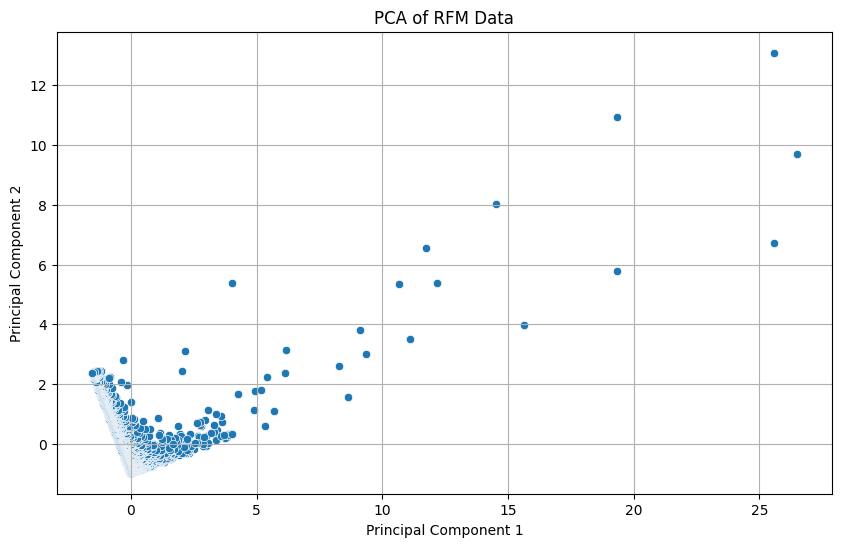

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, marker='o')
plt.title('PCA of RFM Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [67]:
#Calculation for RFM
rfm_df['CLV'] = rfm_df['Recency'] * rfm_df['Frequency'] * rfm_df['Monetary']

print(rfm_df)


            Recency  Frequency   Monetary         CLV
CustomerID                                           
14911.0           0       5677  143825.06        0.00
12748.0           0       4596   33719.73        0.00
14606.0           0       2700   12156.65        0.00
15311.0           0       2379   60767.90        0.00
13263.0           0       1677    7454.07        0.00
...             ...        ...        ...         ...
17908.0         373         58     243.28  5263119.52
16583.0         373         14     233.45  1219075.90
18074.0         373         13     489.60  2374070.40
12791.0         373          2     192.60   143679.60
13747.0         373          1      79.60    29690.80

[4339 rows x 4 columns]


In [68]:
# For Tableau
# Explore product associations to understand which items are often purchased together.
from itertools import combinations
from collections import Counter
# Function to count product pairs
def count_product_pairs(df):
    pair_counter = Counter()
    for _, group in df.groupby('InvoiceNo'):
        products = list(group['Description'].unique())
        for pair in combinations(products, 2):
            pair_counter[pair] += 1
    return pair_counter
# Apply the function to the dataset
product_pairs = count_product_pairs(df)
pairs_df = pd.DataFrame(product_pairs.items(), columns=['Product Pair', 'Count'])
pairs_df.sort_values(by='Count', ascending=False, inplace=True)
pairs_df.head()
4:21
# Extract the 'Product Pair' column as a list
product_pairs_list = pairs_df['Product Pair'].tolist()
top_10_pairs_df = pairs_df.head(10)
# Display the first few pairs to verify
for elem in product_pairs_list[:10]:
    print(elem)

SyntaxError: illegal target for annotation (3571221148.py, line 18)